# Eccomerce Data Analysis  Project using Linear Regression 
An ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want. The company is trying to decide whether to focus their efforts on their mobile app experience or their website. 


<table align="center">
  
  <td align="center"><a target="_blank" href="https://colab.research.google.com/drive/1_zqgsE4M3M7xjlDgkoPYiRNBXg4OT4rV?authuser=2#scrollTo=spJCE-HI8CNk">
        <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTR7EtP27gljpJg91k2DVoRgkB84hkMl78bOA&usqp=CAU""  style="padding-bottom:5px;" />
        
  Run this project in Google Colab</a></td>
  
</table>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We need to download the data first

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!wget https://raw.githubusercontent.com/gmashik/Machine_learning_projects/master/E_commerce_project/data/Ecommerce%20Customers

Need to read the data from Ecommerce Customers csv file as a Pandas DataFrame 

In [4]:
ecomdata=pd.read_csv("Ecommerce Customers")

# Now exproe the data info

In [5]:
ecomdata.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
ecomdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [ ]:
ecomdata.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


**Let's explore the data visually to get an idea how the featers are **

In [ ]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

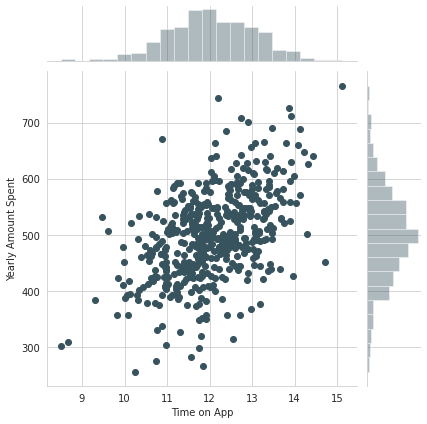

In [ ]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=ecomdata)

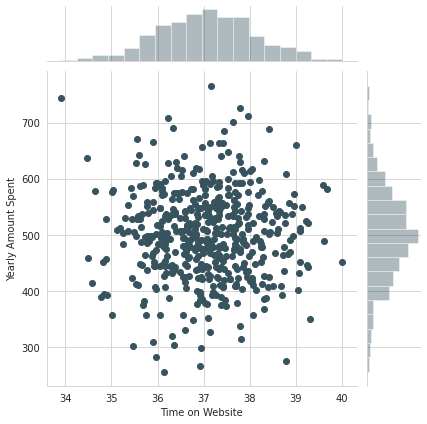

In [ ]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=ecomdata)

`Time sepnt on App and yearly spending seems to have some linear relationship`

A Hex and kde plot are shown below

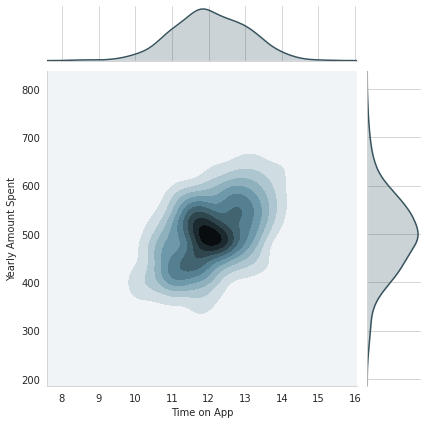

In [ ]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',kind='kde',data=ecomdata)

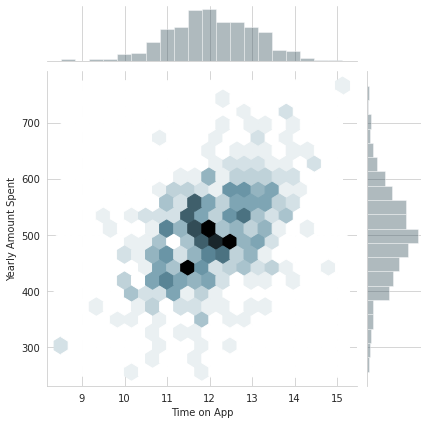

In [ ]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',kind='hex',data=ecomdata)

To get an overview of the features we aregoing to use pairplot

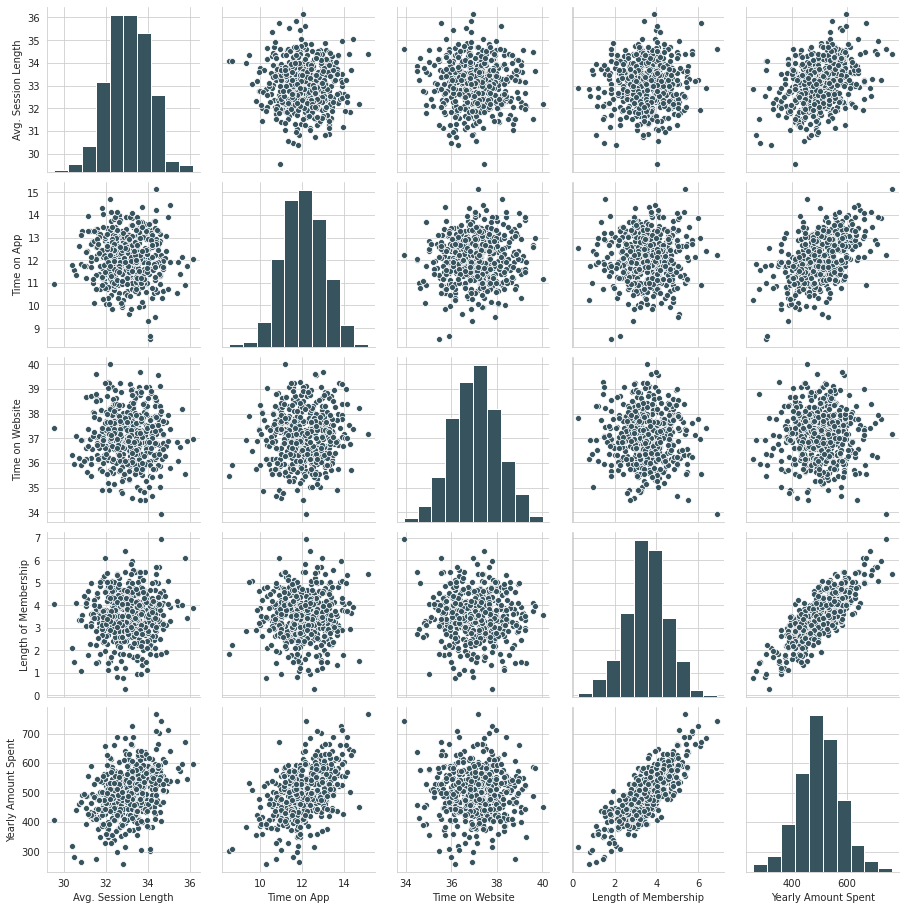

In [ ]:
sns.pairplot(ecomdata,palette="BuGn_r")

**Based on this pairplot we can see that the length of the membership is linearly related to the customers yearly spending. However the app time spending is also an important feature. Lets explore this using the linear model plot **

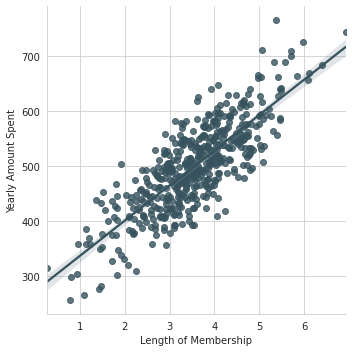

In [ ]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=ecomdata)

# **Analysis using Linear Regression**

So, the company needs a strong reason wheather they spend their budget in the App developement or Website developement. 
For this decesion we are going to make an analysis that how Yearly Spent Amount of customers going to be affected if any of our features such as Time spent on App, Length of Membership changes. 
We are going to make a linear model.  Set the target variable  is** "Yearly Amount Spent"** and the features are **'Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership'**.
So basically the model is 
**$y=W_1x_1+W_2x_2+W_3x_3+W_4x_4$** 

Where $W_1$,$W_2$,$W_3$,$W_4$ are the weights of the variable

In [ ]:
y=ecomdata['Yearly Amount Spent']
x=ecomdata[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

**Now we are going to train the model**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linm=LinearRegression(fit_intercept=False,normalize=False)#instansiate model

**Train the model using fit**

In [ ]:
linm.fit(x_train,y_train,sample_weight=None)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

Predict the test data for the model accuracy

In [ ]:
p_test=linm.predict(x_test)

In [ ]:
from sklearn import  metrics

# **Model Evaluation**

In [ ]:
print('Mean absolute error:', metrics.mean_absolute_error(y_test, p_test))
print('Mear Squared error:', metrics.mean_squared_error(y_test, p_test))
print('Root Mear Squared error:', np.sqrt(metrics.mean_squared_error(y_test,p_test)))

Mean absolute error: 8.070738748151477
Mear Squared error: 101.68389701192268
Root Mear Squared error: 10.083843365102549


Form this error analysis it can be said that the model is not so bad.

**The distribution of residul**

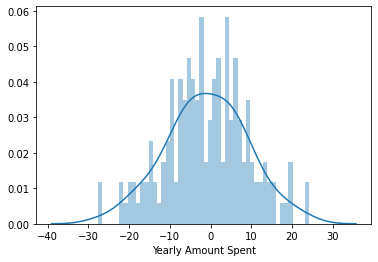

In [ ]:
sns.distplot((y_test-p_test),bins=50)

### **Weights of the model**

In [ ]:
print('Weights: \n', linm.coef_)

Weights: 
 [25.94070373 38.93222435 -0.10398247 61.16446811]


Tabular form

In [ ]:
weight=pd.DataFrame(linm.coef_,x.columns)
weight.columns=['Weight']
weight

,Weight
Avg. Session Length,25.940704
Time on App,38.932224
Time on Website,-0.103982
Length of Membership,61.164468


Comments on the weights analysis:

- If we keep all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.940704 total dollars spent**.
- If we keep all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.932224 total dollars spent**.
- If we keep all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.709183 total dollars spent**.
- If we keep all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.674205 total dollars spent**.

# **Conclusion on "should focus more on their mobile app or on their website?"**


We can think about this in two ways: 
 Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company,So we need to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion. We can see that both app vs membership length and website vs membership length has similar relationship pattern. So, my suggestion is to spend more on the App develoement. 
